## Imports

In [1]:
from base_Imports_and_Functions import *

Thermals_db = xr.open_dataset(savenet_path +'Thermals_data_base.nc')
thermals_reduced = Thermals_db.where(
    (Thermals_db['latitude'] > extent_son[2]) & (Thermals_db['latitude'] < extent_son[3]) & 
    (Thermals_db['longitude'] > extent_son[0]) & (Thermals_db['longitude'] < extent_son[1]),
    drop = True)

## Processing diurn cycle

In [ ]:
type = ['son','father','AROME']

for i in range(3):
    for j in range(2):
        reduced_simu = xr.open_dataset(savenet_path+type[i]+'_'+str(19+i) + '.nc')
        thermals_reduced_daily = thermals_reduced.where(
            (thermals_reduced['dayofflight'] == 19+j),
            drop = True)
        diurn_cycle = new_diurn_cycle_th(thermals_reduced,reduced_simu)
        np.save(savenpa_path+'diurn_cycle_'+type[i]+'_'+str(19+j)+'.npy',diurn_cycle)

## Plotting

In [2]:
lows_son = np.load(savenpa_path+'low_son.npy')
medians_son = np.load(savenpa_path+'median_son.npy')
highs_son = np.load(savenpa_path+'high_son.npy')

lows_father = np.load(savenpa_path+'low_father.npy')
medians_father = np.load(savenpa_path+'median_father.npy')
highs_father = np.load(savenpa_path+'high_father.npy')

lows_AROME = np.load(savenpa_path+'low_AROME.npy')
medians_AROME = np.load(savenpa_path+'median_AROME.npy')
highs_AROME = np.load(savenpa_path+'high_AROME.npy')

diurn_cycle_son_19 = np.load(savenpa_path+'diurn_cycle_son_19.npy')
diurn_cycle_son_20 = np.load(savenpa_path+'diurn_cycle_son_20.npy')
diurn_cycle_father_19 = np.load(savenpa_path+'diurn_cycle_father_19.npy')
diurn_cycle_father_20 = np.load(savenpa_path+'diurn_cycle_father_20.npy')
diurn_cycle_AROME_19 = np.load(savenpa_path+'diurn_cycle_AROME_19.npy')
diurn_cycle_AROME_20 = np.load(savenpa_path+'diurn_cycle_AROME_20.npy')

AROME_19 = xr.open_dataset(savenet_path+'Comp_AROME_19_RvUV.nc')
AROME_20 = xr.open_dataset(savenet_path+'Comp_AROME_20_RvUV.nc')

Son_19 = xr.open_dataset(savenet_path+'comp_son_19_RvUV.nc')
Son_20 = xr.open_dataset(savenet_path+'Comp_son_20_RvUV.nc')

Father_19 = xr.open_dataset(savenet_path+'Comp_father_19_RvUV.nc')
Father_20 = xr.open_dataset(savenet_path+'Comp_father_20_RvUV.nc')

In [3]:
def to_plot_diurn(low_son,median_son,high_son,low_father,median_father,high_father,diurn_th_19_son,diurn_th_20_son,diurn_th_19_father,diurn_th_20_father,diurn_th_19_AROME,diurn_th_20_AROME,Father_19,Father_20,Son_19,Son_20,AROME_19,AROME_20,option):
    ticks_time1 = [i for i in range(0,24,6)]
    ticks_time2 = [i for i in range(24,48,6)]
    ticks_time = np.array(ticks_time1 + ticks_time2)
    P0 = 100000
    
    labels_ticks_time = np.array(['19/08 ' + str(i)+'h' for i in ticks_time1] + ['20/08 ' + str(i-24)+'h' for i in ticks_time2])
    diurn_labels = ['$\\theta$ (°C)', 'Wind norm ($m.s^{-1}$)','Rv (g/kg)','Pression (Pa)']
    diurn_labels_BHL = ['BLH (m asl)', 'W max ($m.s^{-1}$)']
    line_styles = ['dashed','solid','dashed']

    if option == 0 :

        for i in range(2) :
            ax = axs[i]

            ax.grid(visible=True, axis='both', color = '0.80')
            ax.set_xticks(ticks_time, labels_ticks_time, fontsize=size)

            if i == 0 :

                res_tot = np.load(savenpa_path+'BLH_cycle_f.npy')

                alphas = [0.3,0.3,0.3]
                styles = ['dashed','solid','dashed']
                colors = ['k','b','g','r']
                labels = ['Gliders','LES200','LES600','AROME']
                
                for k in range(12):
                    if k%3 == 1 :
                        ax.plot(res_tot[k],linestyle = styles[k%3], color = colors[k//3],label = labels[k//3])
                    elif k+2 < 12 :
                        ax.fill_between(np.arange(48),res_tot[k],res_tot[k+2], alpha = alphas[k%3], color = colors[k//3])
                        #ax.plot(res_tot[k],linestyle = styles[k%3], alpha = alphas[k%3], color = colors[k//3])
            if i == 1 :
                ax.fill_between(np.arange(24), diurn_cycle_father_19[3,:], diurn_cycle_father_19[5,:],color = 'g',alpha = 0.3)
                ax.plot(np.arange(24),diurn_cycle_father_19[4,:],linestyle = 'solid',color = 'g')

                ax.fill_between(np.arange(24,48), diurn_cycle_father_20[3,:], diurn_cycle_father_20[5,:],color = 'g',alpha = 0.3)
                ax.plot(np.arange(24,48),diurn_cycle_father_20[4,:],linestyle = 'solid',color = 'g')
                
                ax.fill_between(np.arange(24), diurn_cycle_father_19[0,:], diurn_cycle_father_19[2,:],color = 'k',alpha = 0.3)
                ax.plot(np.arange(24),diurn_cycle_father_19[1,:],linestyle = 'solid',color = 'k')

                ax.fill_between(np.arange(24,48), diurn_cycle_father_20[0,:], diurn_cycle_father_20[2,:],color = 'k',alpha = 0.3)
                ax.plot(np.arange(24,48),diurn_cycle_father_20[1,:],linestyle = 'solid',color = 'k')

                ax.fill_between(np.arange(24), diurn_cycle_son_19[3,:], diurn_cycle_son_19[5,:],color = 'b',alpha = 0.3)
                ax.plot(np.arange(24),diurn_cycle_son_19[4,:],linestyle = 'solid',color = 'b')
                
                ax.fill_between(np.arange(24,48), diurn_cycle_son_20[3,:], diurn_cycle_son_20[5,:],color = 'b',alpha = 0.3)
                ax.plot(np.arange(24,48),diurn_cycle_son_20[4,:],linestyle = 'solid',color = 'b')

                ax.fill_between(np.arange(24), diurn_cycle_AROME_19[3,:], diurn_cycle_AROME_19[5,:],color = 'r',alpha = 0.3)
                ax.plot(np.arange(24),diurn_cycle_AROME_19[4,:],linestyle = 'solid',color = 'r')

                ax.fill_between(np.arange(24,48), diurn_cycle_AROME_20[3,:], diurn_cycle_AROME_20[5,:],color = 'r',alpha = 0.3)
                ax.plot(np.arange(24,48),diurn_cycle_AROME_20[4,:],linestyle = 'solid',color = 'r')

                ax.plot([-10,-10],[-10,-10],'k', label = 'Gliders')
                ax.plot([-10,-10],[-10,-10],'b', label = 'LES200')
                ax.plot([-10,-10],[-10,-10],'g', label = 'LES600')
                ax.plot([-10,-10],[-10,-10],'r', label = 'AROME')
                
                ax.set_ylim((0,8))
                
            ax.set_xlim((0,49))
            ax.set_ylabel(diurn_labels_BHL[i],fontsize = size)
            ax.tick_params('x', labelsize=size)
            ax.tick_params('y', labelsize=size)
            ax.legend()

        lows_f,medians_f,highs_f,lows_s,medians_s,highs_s,lows_A,medians_A,highs_A = all_traces_diurn_rvuv(Father_19,Father_20,Son_19,Son_20,AROME_19,AROME_20)

        for i in range(3) :
            ax = axs[i+2]
            
            ax.grid(visible=True, axis='both', color = '0.80')
            ax.set_xticks(ticks_time, labels_ticks_time, fontsize=size)
            ax.tick_params('x', labelsize=size)
            ax.tick_params('y', labelsize=size)
            
            if i == 0 :   
                ax.plot(medians_son[2*i,:],color = 'k',label = 'Stations')
                ax.plot(medians_son[2*i+1,:]-273.15,'b',label = 'LES200')
                ax.plot(medians_father[2*i+1,:]-273.15,'g',label = 'LES600')
                ax.plot(medians_A[2*i+1,:]-273.15,'r',label = 'AROME')

                ax.fill_between(np.arange(48), lows_son[2*i+1,:]-273.15, highs_son[2*i+1,:]-273.15,color = 'b',alpha = 0.3)
                ax.fill_between(np.arange(48), lows_father[2*i+1,:]-273.15, highs_father[2*i+1,:]-273.15,color = 'g',alpha = 0.3)
                ax.fill_between(np.arange(48), lows_A[2*i+1,:]-273.15, highs_A[2*i+1,:]-273.15,color = 'r',alpha = 0.3)
                ax.fill_between(np.arange(48), lows_son[2*i,:], highs_son[2*i,:],color = 'k',alpha = 0.3)
        
            elif i == 4 :
                P0 = 100000

                ax.fill_between(np.arange(48), lows_son[2*i+1,:]/P0, highs_son[2*i+1,:]/P0,color = 'b',alpha = 0.3)
                ax.fill_between(np.arange(48), lows_father[2*i+1,:]/P0, highs_father[2*i+1,:]/P0,color = 'g',alpha = 0.3)
                ax.fill_between(np.arange(48), lows_A[2*i+1,:]/P0, highs_A[2*i+1,:]/P0,color = 'r',alpha = 0.3)
                ax.fill_between(np.arange(48), lows_son[2*i,:], highs_son[2*i,:],color = 'k',alpha = 0.3)

                ax.plot(medians_son[2*i,:],color = 'k',label = 'Stations')
                ax.plot(medians_son[2*i+1,:]/P0,'b',label = 'LES200')
                ax.plot(medians_father[2*i+1,:]/P0,'g',label = 'LES600')
                ax.plot(medians_A[2*i+1,:]/P0,'r',label = 'AROME')
                
            else :
                ax.fill_between(np.arange(48), lows_son[2*i+1,:], highs_son[2*i+1,:],color = 'b',alpha = 0.3)
                ax.fill_between(np.arange(48), lows_father[2*i+1,:], highs_father[2*i+1,:],color = 'g',alpha = 0.3)
                ax.fill_between(np.arange(48), lows_A[2*i+1,:], highs_A[2*i+1,:],color = 'r',alpha = 0.3)
                ax.fill_between(np.arange(48), lows_son[2*i,:], highs_son[2*i,:],color = 'k',alpha = 0.3)

                ax.plot(medians_son[2*i,:],color = 'k',label = 'Stations')
                ax.plot(medians_son[2*i+1,:],'b',label = 'LES200')
                ax.plot(medians_father[2*i+1,:],'g',label = 'LES600')
                ax.plot(medians_A[2*i+1,:],'r',label = 'AROME')

                    
            ax.set_ylabel(diurn_labels[i],fontsize=size)
            ax.tick_params('x', labelsize=size)
            ax.tick_params('y', labelsize=size)
            ax.legend()
                
    if option == 1 :

        for i in range(2) :
            ax = axs[i]

            ax.grid(visible=True, axis='both', color = '0.80')
            ax.set_xticks(ticks_time, labels_ticks_time, fontsize=size)

            if i == 0 :

                lows_f,medians_f,highs_f,lows_s,medians_s,highs_s,lows_A,medians_A,highs_A = all_traces_diurn_BHL_2(reduced_BHL_19,reduced_BHL_20,reduced_BHL_son_19,reduced_BHL_son_20,reduced_BHL_AROME_19,reduced_BHL_AROME_20)
                
                ax.plot(medians_f[0,:],'g',label = 'LES600')
                ax.plot(medians_s[0,:],'b',label = 'LES200')
                ax.plot(medians_f[1,:],'k',label = 'Gliders')
                ax.plot(medians_A[0,:],'r',label = 'AROME')
            
            if i == 1 :

                for l in range(1,2):
                    ax.plot(np.arange(24),diurn_th_19_son[2*l,:], linestyle =line_styles[l], color = 'b')
                    ax.plot(np.arange(24),diurn_th_19_son[2*l+1,:], linestyle =line_styles[l], color = 'k')
                    ax.plot(np.arange(24),diurn_th_19_AROME[2*l,:], linestyle =line_styles[l], color = 'r')

                    ax.plot(np.arange(24,48),diurn_th_20_son[2*l,:], linestyle =line_styles[l], color = 'b')
                    ax.plot(np.arange(24,48),diurn_th_20_son[2*l+1,:], linestyle =line_styles[l], color = 'k')
                    ax.plot(np.arange(24,48),diurn_th_20_AROME[2*l,:], linestyle =line_styles[l], color = 'r')
                    
                    ax.plot(np.arange(24),diurn_th_19_father[2*l,:], linestyle =line_styles[l], color = 'g')
                    ax.plot(np.arange(24,48),diurn_th_20_father[2*l,:], linestyle =line_styles[l], color = 'g')

                ax.plot([-10,-10],[-10,-10],'k', label = 'Gliders')
                ax.plot([-10,-10],[-10,-10],'g', label = 'LES600')
                ax.plot([-10,-10],[-10,-10],'b', label = 'LES200')
                ax.plot([-10,-10],[-10,-10],'r', label = 'AROME')
                
                ax.set_ylim((0,8))
                
            ax.set_xlim((0,49))
            ax.set_ylabel(diurn_labels_BHL[i], fontsize = size)
            ax.tick_params('x', labelsize=size)
            ax.tick_params('y', labelsize=size)
            ax.legend()

        lows_f,medians_f,highs_f,lows_s,medians_s,highs_s,lows_A,medians_A,highs_A = all_traces_diurn_rvuv(Father_19,Father_20,Son_19,Son_20,AROME_19,AROME_20)

        for i in range(3) :
            ax = axs[i+2]
            
            ax.grid(visible=True, axis='both', color = '0.80')
            ax.set_xticks(ticks_time, labels_ticks_time, fontsize=size)
            
            if i == 0 :
                ax.plot(medians_son[2*i+1,:]-273.15,'b',label = 'LES200')
                ax.plot(medians_father[2*i+1,:]-273.15,'g',label = 'LES600')
                ax.plot(medians_A[2*i+1,:]-273.15,'r',label = 'AROME')
                ax.plot(medians_son[2*i,:],color = 'k',label = 'stations')
        
            elif i == 4 :
                P0 = 100000
                ax.plot(medians_son[2*i+1,:]/P0,'b',label = 'LES200')
                ax.plot(medians_father[2*i+1,:]/P0,'g',label = 'LES600')
                ax.plot(medians_A[2*i+1,:]/P0,'r',label = 'AROME')
                ax.plot(medians_son[2*i,:],color = 'k',label = 'stations')
                
            else :
                ax.plot(medians_son[2*i+1,:],'b',label = 'LES200')
                ax.plot(medians_father[2*i+1,:],'g',label = 'LES600')
                ax.plot(medians_A[2*i+1,:],'r',label = 'AROME')
                ax.plot(medians_son[2*i,:],color = 'k',label = 'stations')

            ax.set_ylabel(diurn_labels[i], fontsize = size)
            ax.tick_params('x', labelsize=size)
            ax.tick_params('y', labelsize=size)
            ax.legend()

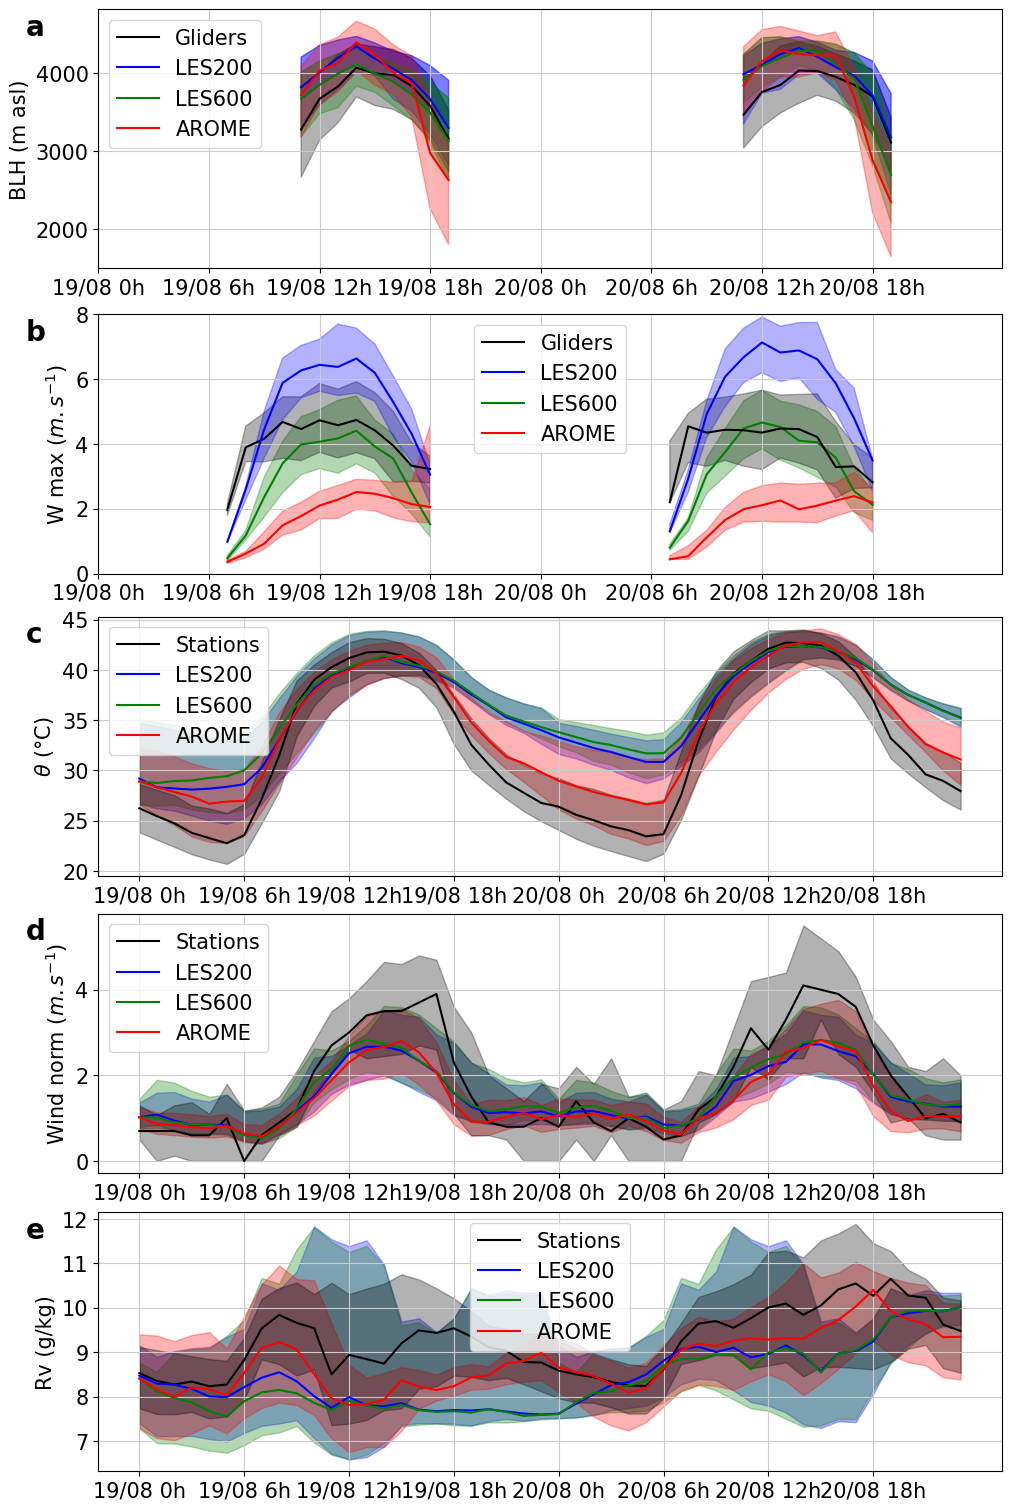

In [4]:
fig, axs = plt.subplots(nrows = 5, ncols = 1, figsize = (10,15), layout = "constrained")
alpha = 0.5
size = 15
to_plot_diurn(lows_son,medians_son,highs_son,lows_father,medians_father,highs_father,diurn_cycle_son_19,diurn_cycle_son_20,diurn_cycle_father_19,diurn_cycle_father_20,diurn_cycle_AROME_19,diurn_cycle_AROME_20,Father_19,Father_20,Son_19,Son_20,AROME_19,AROME_20,0)

for i in range(5):
    ax = axs[i]
    ax.text(-0.08, 0.9, string.ascii_lowercase[i], transform=ax.transAxes, 
            size=20, weight='bold')
    
plt.savefig(savefig_path +'diurn_cycle.png')